<b/>PHYS40591/64591 RADIO ASTRONOMY 2015

Examples covering material in lectures 5&6</b>




----------------------------------------------------------------------------

<b/>Question 1.</b>

<i/>Future careless Lunar astronauts leave an open microwave oven radiating a power of 600W (uniformly in the range 2.7 GHz to 2.8 GHz) and pointing out of their laboratory window directly towards the Earth. Calculate the apparent flux density of the oven assuming it acts as antenna with an effective area of 0.07m$^2$. Comment on your answer.
(The distance to the Moon is $3.84 \times 10^5$ km and assume no loss in the window).</i>

In [20]:
const_c = 3e8 # m/s

nu = 2.75e9   # Hz
dnu = 100e6   # Hz

pwr = 600     # Watts

lam = const_c/nu
print "Wavelength = ",lam," m"

pwr_sp = pwr/dnu
print "Spectral power: ",pwr_sp," Watts / Hz"

Wavelength =  0.109090909091  m
Spectral power:  6e-06  Watts / Hz


If this power was radiated isotropically over $4\pi$ sterad then 1 m$^2$ of area on the Earth would receive:

In [21]:
import numpy as np

R_E = 3.84e5*1e3   # m

pwr_1m = pwr_sp/(4*np.pi*R_E**2)
print "Power received in 1 sq. metre: ",pwr_1m," Watts/Hz/m^2  = ",pwr_1m*1e26," Jy"

Power received in 1 sq. metre:  3.23801560652e-24  Watts/Hz/m^2  =  323.801560652  Jy


But the beam is not isotropic, it's concentrated into a smaller angle than the full $4\pi$ sterads... If the effective area is $A_{\rm eff}$ then we can work out the corresponding effective diameter:

In [22]:
A_eff = 0.07    # m^2

d_eff = np.sqrt(4.*A_eff/np.pi)
print "Effective diameter: ",d_eff," m"

Effective diameter:  0.298541066072  m


and once we know that, we can work out the size of the solid angle:

In [23]:
theta_half = 1.02*lam/d_eff
omega = 1.15*theta_half**2
print "Beam solid angle: ",omega," rad^2"

Beam solid angle:  0.15975966714  rad^2


From this we can work out the beam concentration relative to the isotropic case:

In [24]:
concentration_factor = 4.*np.pi/omega
print "Concentration factor: ",concentration_factor

Concentration factor:  78.6579669284


and hence the effective flux density:

In [25]:
S_eff = concentration_factor*pwr_1m
print "Effective flux density: ",S_eff*1e26," Jy"

Effective flux density:  25469.5724492  Jy






----------------------------------------------------------------------------

<b/>Question 2.</b>

<i/>A square rectangular aperture of side $D$ also corresponds to $u$ radio wavelengths i.e.
the aperture is $u = D/\lambda$ radio wavelengths across. Calculate the 1-D far-field power response function $P_{\rm n}(\theta) = [\sin(\pi u \theta)/(\pi u \theta)]^2$ as a function of $\theta$ (radians ) from the direction perpendicular to the plane of the aperture at points where $\pi u \theta = 0.5, 1.0, 1.5.....5.0$. Measure the half-power width of $P_{\rm n}(\theta)$ and note the value of $\theta$ at which the first minimum occurs. Compare your answers with the equivalent values for a circular beam. (Comment: it’s good to do this standard calculation by hand at least once!)</i>

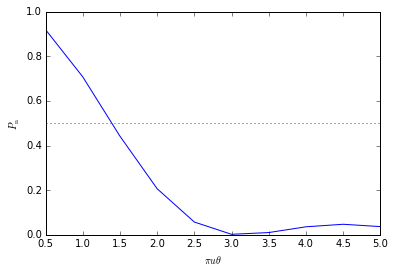

In [26]:
%matplotlib inline

import pylab as pl

pi_u_theta = np.arange(0.5,5.5,0.5)
Pn = (np.sin(pi_u_theta)/pi_u_theta)**2

pl.subplot(111)

# plot the function:
pl.plot(pi_u_theta,Pn)
pl.xlabel(r"$\pi u \theta$")
pl.ylabel(r"$P_{\rm n}$")

# and plot a line to show the half-max
pl.plot([0.5,5.0],[0.5,0.5],ls=':')
pl.show()

The half-power point crosses at about $\pi u \theta = 1.39$, so $\theta = 0.442/u$ and so $\theta_{1/2} = 0.884/u$.

For the minimum we can see from the formula that the $\sin$ function in the numerator will equal zero when $\pi u \theta = \pi$, so when $\theta = 1/u$.





----------------------------------------------------------------------------

<b/>Question 3.</b>

<i/>A radio antenna has a diameter of 20 m and is operated at wavelength of 600 MHz. Estimate the half-power beamwidth ($\theta_{1/2}$; FWHM) expressed degrees.</i>

In [27]:
d = 20.       # m
nu = 600e6    # Hz

lam = const_c / nu
print "Wavelength = ",lam," m"

theta_half = 1.15*lam/d
print "theta_1/2 = ",theta_half*180./np.pi," degrees"

Wavelength =  0.5  m
theta_1/2 =  1.647253661  degrees






----------------------------------------------------------------------------

<b/>Question 4.</b>

<i/>A radio telescope has a diameter of 100m and is being operated at a frequency of 30 GHz. At approximately what distance from the telescope does the Fraunhofer regime start? Is this within or beyond the atmosphere?</i>

In [28]:
d = 100.    # m
nu = 30e9   # Hz

lam = const_c / nu
print "Wavelength = ",lam," m"

#Rayleigh distance:
R_ray = 2.*d**2/lam
print "Rayleigh distance: ",R_ray," m   =",R_ray/1000.," km"

Wavelength =  0.01  m
Rayleigh distance:  2000000.0  m   = 2000.0  km


This is pretty much outside the atmosphere. The top of the ionosphere is at about 1000 km.





----------------------------------------------------------------------------

<b/>Question 5.</b>

<i/>The telescope in Q4 has surface with an rms roughness of 300 microns compared to a perfect paraboloid. What is its effective surface reflectivity? At what higher frequency would you estimate that the telescope has reached its useful limit?</i>


We need to use the Ruze formula for reflectivity,

$$r = \exp{\left[\frac{-4\pi\delta}{\lambda}\right]^2},$$

where $\delta$ is the rms surface error.

In [29]:
delta = 300e-6     # m

r = np.exp(-(4*np.pi*delta/lam)**2)
print "Reflectivity: ",r

Reflectivity:  0.867515149966


A reasonable limit for the usefulness of a telescope is when the reflectivity drops below $r = 0.5$, so let's use that as a guide. We need to re-arrange the Ruze formula:

$$\lambda = 4\pi\delta/\sqrt{\ln{2}}$$

In [31]:
lam_lim = 4*np.pi*delta/np.sqrt(np.log(2))

nu_lim = const_c/lam_lim
print "Limiting wavelength: ",lam_lim," m"
print "Limiting frequency: ",nu_lim," Hz   =",nu_lim/1e9," GHz"

Limiting wavelength:  0.00452812480261  m
Limiting frequency:  66252590879.8  Hz   = 66.2525908798  GHz





----------------------------------------------------------------------------

<b/> Done! </b>